# 1. Normal graph prediction:
### 1.1. Load friend network from edge-list file [data/friend_network.txt](https://github.com/NSLab-CUK/Graph-Mining-Spring-2023/blob/main/W6/data/friend_network.txt)
### 1.2. Complete the following requirements:
- Compute the following coefficient score:
+ Jaccard’s coefficient
+ Adamic-Adar
+ Preferential attachment (PA)
+ Salton index
+ Sorensen index
+ Hub Promoted index
+ Hub Depressed Index
+ SimRank similarity
- List of friend: [("Ana", "Tino"), ("Mark", "Tim")]

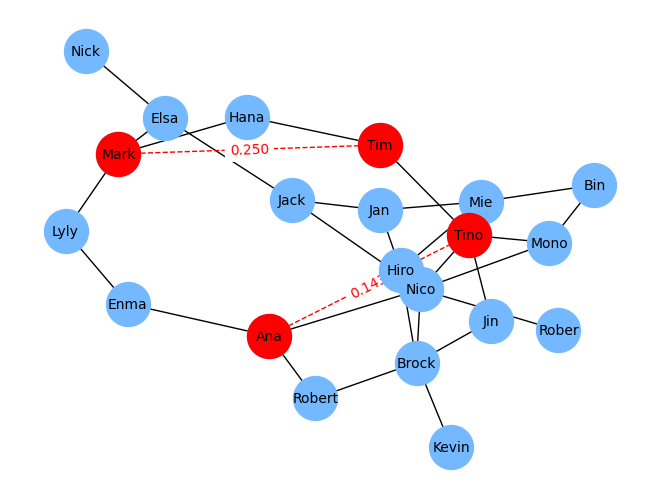

In [2]:
import networkx as nx

# Read graph data from edgelist
G = nx.read_edgelist("data/friend_network.txt")

# Draw graph with coefficient edges
def draw_coefficient_edges(G, preds):
    edge_labels = {}
    target_list = []

    for u, v, p in preds:
        edge_labels[(u, v)] = f"{p:.3f}"
        target_list.append(u)
        target_list.append(v)
        
    pos = nx.spring_layout(G)

    nx.draw(G, pos, 
            node_size=1000,
            node_color='#74b9ff',
            with_labels=True,
            font_size = 10)
    # Mark target nodes as green color
    nx.draw_networkx_nodes(G, pos, 
                           nodelist=target_list,
                           node_size=1000,
                           node_color='r')
    nx.draw_networkx_edges(G, pos, edgelist=node_list, style='dashed', edge_color='r')

    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=edge_labels,
        font_color='red'
    )

# Calculate Jaccard’s coefficient of node pairs in a list of nodes
node_list = [("Ana", "Tino"), ("Mark", "Tim")]
preds = nx.jaccard_coefficient(G, node_list)
draw_coefficient_edges(G, preds)

# 2. Assignment on large-scale network:
+ Load SC-TS graph from the file: [data/SC-TS.txt](https://github.com/NSLab-CUK/Graph-Mining-Spring-2023/blob/main/W6/data/SC-TS.txt) in the class github.
+ Read pair of nodes in the file: [data/node-pair.txt]()
+ Calculate common neighbors, Jaccard (JC), Adamic-Adar (AA), Preferential attachment (PA) of these above pair of nodes.
+ Draw graph and the link among above node pairs.

SimRank similarity: 
(F17E9.12, F45E1.6) -> 0.11804462
(C50F4.5, T23D8.5) -> 0.11804340
(B0035.8, B0035.10) -> 0.11805700


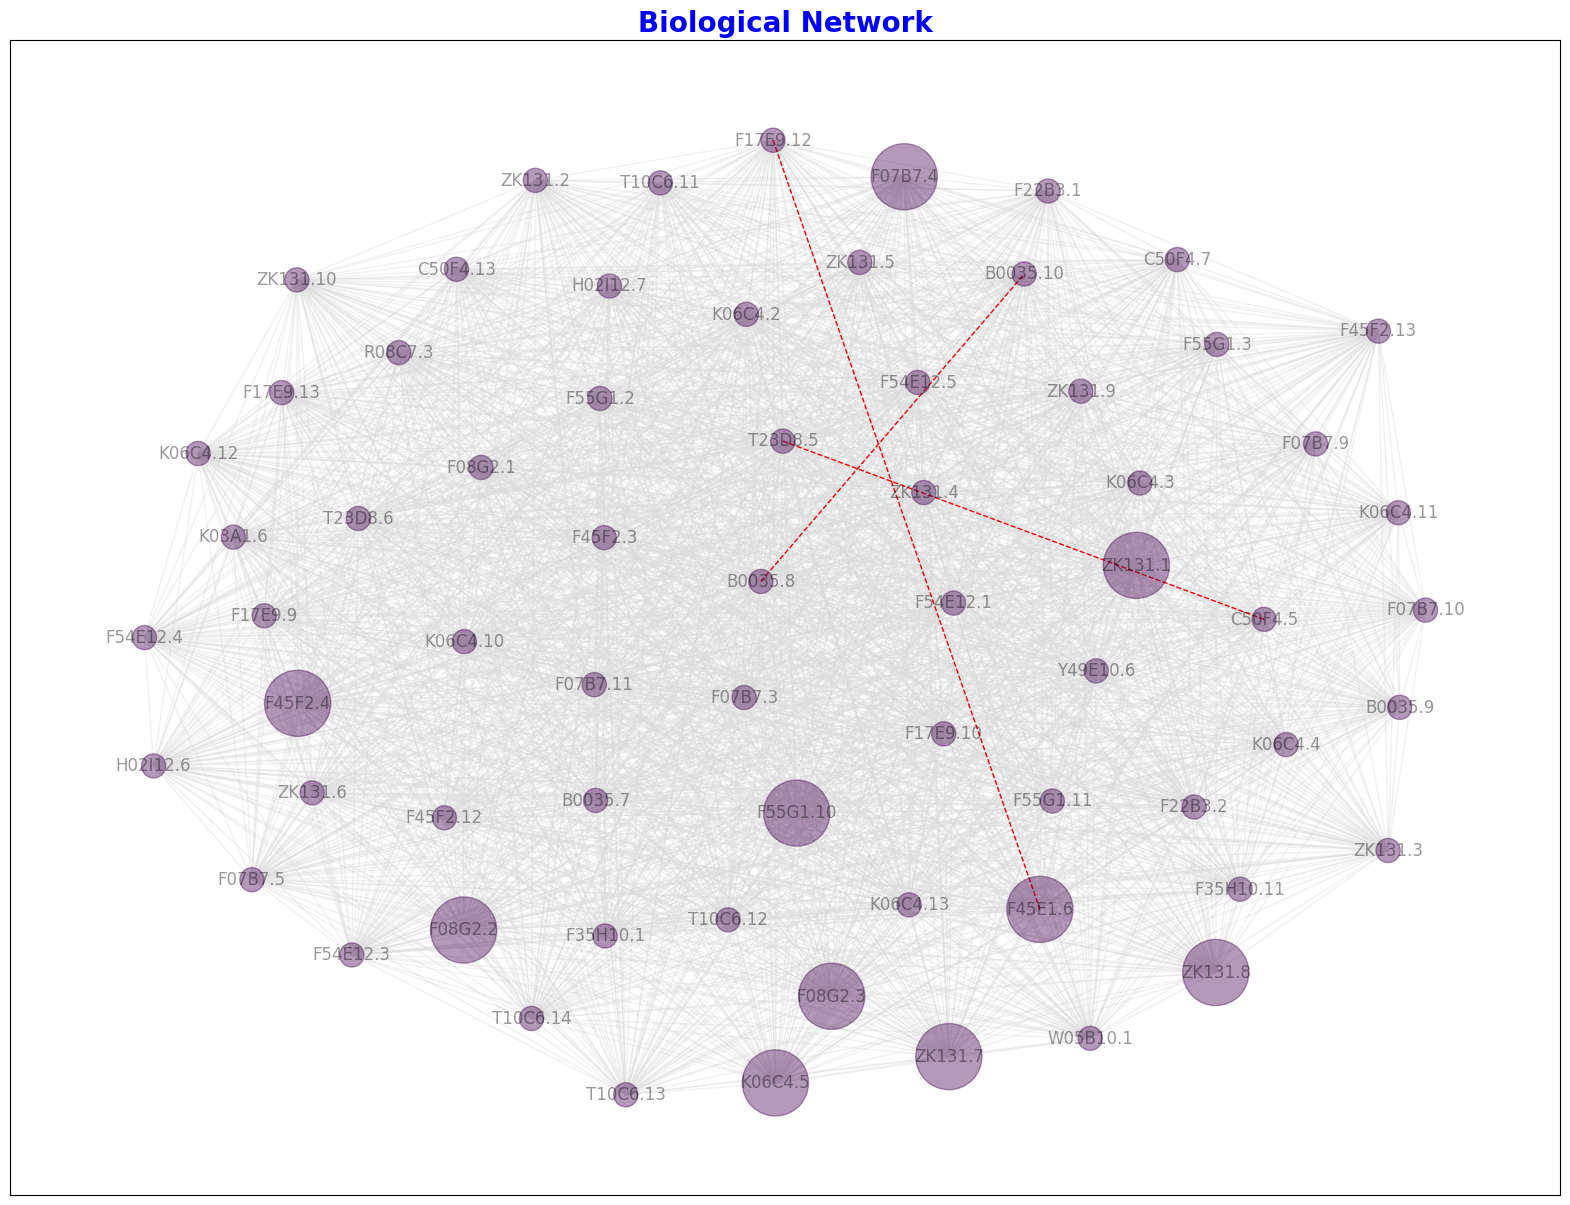

In [7]:
import matplotlib.pyplot as plt

# Function to calculate SimRank similarity of a list of node pairs
def calculate_simrank_similarity(G, node_list):
    return ((source, target, nx.simrank_similarity(G, source, target)) for source, target in node_list)

# largest connected component
def get_largest_component(G):
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    largest_subgraph = G.subgraph(largest_component)
    
    return largest_subgraph

def draw_graph_betweenness_centrality(G, largest_component, pos):
    # Calculate betweenness centrality
    centrality = nx.betweenness_centrality(largest_component, k=10, endpoints=True)

    # Compute community structure
    lpc = nx.community.label_propagation_communities(largest_component)
    community_index = {n: i for i, com in enumerate(lpc) for n in com}

    # Draw graph using matplotlib
    fig, ax = plt.subplots(figsize=(20, 15))
    node_color = [community_index[n] for n in largest_component]
    node_size = [v * 20000 for v in centrality.values()]
    nx.draw_networkx(
        largest_component,
        pos=pos,
        with_labels=True,
        node_color=node_color,
        node_size=node_size,
        edge_color="gainsboro",
        alpha=0.4,
        
    )

    # Title/legend
    font = {"color": "blue", "fontweight": "bold", "fontsize": 20}
    ax.set_title("Biological Network", font)
    
# Read graph data from edgelist
G = nx.read_weighted_edgelist("data/SC-TS.txt")

# Spring layout
largest_component = get_largest_component(G)
pos = nx.spring_layout(largest_component, k=0.15)
draw_graph_betweenness_centrality(G, largest_component, pos)

node_list =  [('F17E9.12', 'F45E1.6'), ('C50F4.5', 'T23D8.5'), ('B0035.8', 'B0035.10')]

preds = calculate_simrank_similarity(G, node_list)

print("SimRank similarity: ")
for u, v, p in preds:
    print(f"({u}, {v}) -> {p:.8f}")
    
target_list = []

for u, v, p in preds:
    target_list.append(u)
    target_list.append(v)

# Mark edges
nx.draw_networkx_edges(G, pos, edgelist=node_list, style='dashed', edge_color='r')